# Examples
Solvjov (2017) provides five examples for testing the RCSLW model. We reproduce those examples here. These are one-dimensional plane parallel configurations with varying domain width, temperature, and composition profiles. Comparisons are made of the radiative heat flux or volumetric radiative source term for the Planck Mean, WSGG, and RCSLW models. The line-by-line (LBL) data are taken directly from the plots presented in Solvjov (2017). For the RCSLW model, we use the same number of gray gases (four) as in the WSGG model to provide more relevant comparison. In example 5, we show variation in the RCSLW model for different number of gases. In initializing the RCSLW model, average gas properties are used for all examples. Example five shows improved results when using the peak temperature instead of the average.

The motivation for each example is provided in Solvjov (2017). Here, we present the examples to demonstrate the code and give comparisons between the models with available LBL data.

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams.update({'font.size':16, 'figure.autolayout': True});

class _hide_print:
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = open(os.devnull, 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._stdout
        
from ex_1 import ex_1
from ex_2 import ex_2
from ex_3 import ex_3
from ex_4 import ex_4
from ex_5 import ex_5

# Example 1

* This example consists of a uniform, isothermal hot gas layer at $T_{hot}$=2000 K, next to a uniform, isothermal cold gas layer at $T_{cold}$=300 K. 
* P = 1 atm.
* The gas composition throughout is a mixture of water vapor and CO$_2$ with mole fractions $y_{H2O}=0.2$, and $Y_{CO2}$=0.1. 
* The radiative flux at the exit of the cold layer is computed.
* The hot layer thickness is fixed at $L_{hot}=0.5$. The cold layer thickness varies.
* Boundaries are black and cold (incoming intensity is zero).

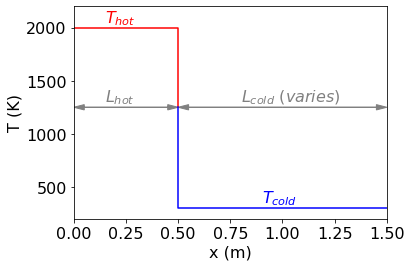

In [2]:
fig, ax = plt.subplots()
ax.plot([0,0.5,0.5],   [2000,2000,1250], color='red')
ax.plot([0.5,0.5,1.5], [1250,300,300],   color='blue')
ax.set_xlabel('x (m)')
ax.set_ylabel('T (K)')
ax.set_xlim([0,1.5])
ax.set_ylim([200,2200])
ax.text(0.9,350,r'$T_{cold}$', color='blue')
ax.text(0.15,2050,r'$T_{hot}$', color='red')
ax.arrow(1,1250, 0.5,0,  fc='gray', ec='gray', head_width=50, head_length=0.05, length_includes_head=True)
ax.arrow(1,1250, -0.5,0, fc='gray', ec='gray', head_width=50, head_length=0.05, length_includes_head=True)
ax.text(0.8, 1300,r'$L_{cold}\,\,(varies)$', color='gray')
ax.arrow(0.25,1250, 0.25,0,  fc='gray', ec='gray', head_width=50, head_length=0.05, length_includes_head=True)
ax.arrow(0.25,1250, -0.25,0, fc='gray', ec='gray', head_width=50, head_length=0.05, length_includes_head=True)
ax.text(0.15,1300,r'$L_{hot}$',  color='gray');

In [3]:
with _hide_print():
    Lcold, qsigT4_pm    = ex_1('planckmean')
    Lcold, qsigT4_wsgg  = ex_1('wsgg')
    Lcold, qsigT4_rcslw = ex_1('rcslw', 4)

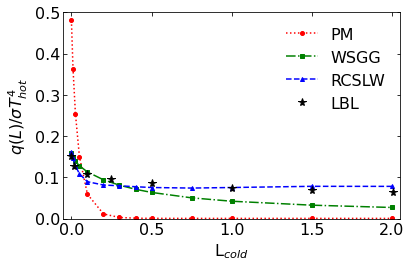

In [4]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_1_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots();
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(Lcold, qsigT4_pm,    'ro:',  markersize=4)
ax.plot(Lcold, qsigT4_wsgg,  'gs-.', markersize=4)
ax.plot(Lcold, qsigT4_rcslw, 'b^--', markersize=4)
ax.plot(lbl[:,0], lbl[:,1],  'k*',   markersize=8)

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False)
ax.set_xlabel(r'L$_{cold}$')
ax.set_ylabel(r'$q(L)/\sigma T_{hot}^4$');
ax.set_xlim([-0.05,2.05])
ax.set_ylim([0.0, 0.5]);
plt.savefig('ex_1.pdf');

# Example 2
* This example is like example 1, but the temperature is isothermal at T=1000 K throughout.
* P = 1 atm.
* There is a *thick* layer with $L_{thick}=0.5$ m and a *thin* layer with varying width.
* The participating gas is CO$_2$ throughout.
* The mole fraction of $CO_2$ is 0.4 in the thick layer and 0.1 in the thin layer.
* The boundaries are black and cold. 

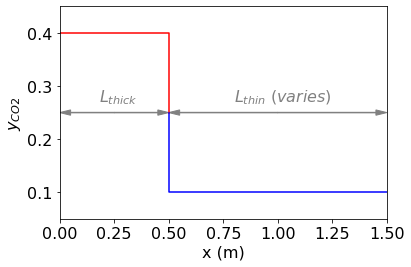

In [5]:
fig, ax = plt.subplots()
ax.plot([0,0.5,0.5],   [0.4,0.4,0.25], color='red')
ax.plot([0.5,0.5,1.5], [0.25,0.1,0.1],   color='blue')
ax.set_xlabel('x (m)')
ax.set_ylabel(r'$y_{CO2}$')
ax.set_xlim([0,1.5])
ax.set_ylim([0.05, 0.45])
ax.arrow(1,0.25, 0.5,0, fc='gray', ec='gray', head_width=0.01, head_length=0.05, length_includes_head=True)
ax.arrow(1,0.25,-0.5,0, fc='gray', ec='gray', head_width=0.01, head_length=0.05, length_includes_head=True)
ax.text(0.8, 0.27,r'$L_{thin}\,\,(varies)$', color='gray')
ax.arrow(0.25,0.25, 0.25,0, fc='gray', ec='gray', head_width=0.01, head_length=0.05, length_includes_head=True)
ax.arrow(0.25,0.25,-0.25,0, fc='gray', ec='gray', head_width=0.01, head_length=0.05, length_includes_head=True)
ax.text(0.18,0.27,r'$L_{thick}$',  color='gray');

In [6]:
with _hide_print():
    Lcold, qsigT4_pm    = ex_2('planckmean')
    Lcold, qsigT4_wsgg  = ex_2('wsgg')
    Lcold, qsigT4_rcslw = ex_2('rcslw', 4)       # perfect agreement with nGG=24

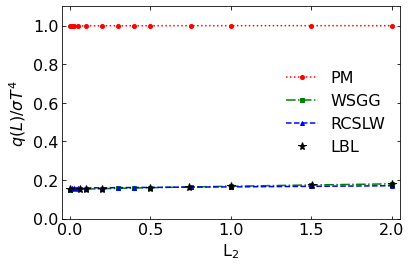

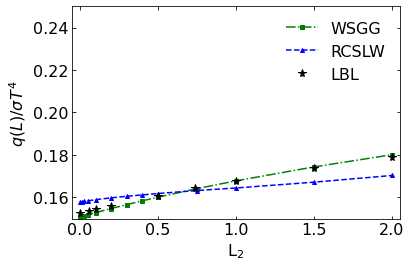

In [7]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_2_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(Lcold, qsigT4_pm,    'ro:',  markersize=4)
ax.plot(Lcold, qsigT4_wsgg,  'gs-.', markersize=4)
ax.plot(Lcold, qsigT4_rcslw, 'b^--', markersize=4)
ax.plot(lbl[:,0], lbl[:,1],  'k*',   markersize=8)

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False)

ax.set_xlabel(r'L$_2$')
ax.set_ylabel(r'$q(L)/\sigma T^4$')
ax.set_xlim([-0.05,2.05])
ax.set_ylim([0.0, 1.1]);
plt.savefig('ex_2a.pdf');

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(Lcold, qsigT4_wsgg,  'gs-.', markersize=4)
ax.plot(Lcold, qsigT4_rcslw, 'b^--', markersize=4)
ax.plot(lbl[:,0], lbl[:,1],  'k*',   markersize=8)

ax.legend(['WSGG', 'RCSLW', 'LBL'], frameon=False)

ax.set_xlabel(r'L$_2$')
ax.set_ylabel(r'$q(L)/\sigma T^4$')
ax.set_xlim([-0.05,2.05])
ax.set_ylim([0.15, 0.25]);
plt.savefig('ex_2b.pdf');

# Example 3
* L = 1 m domain
* P = 1 atm
* Parabolic temperature profile: $T(x) = 4000x(L-x)/L^2 + 800$ K.
* T$_{wall}$ = 800 K (black)
* The participating gas is water vapor with mole fraction profile $y_{H2O}(x)=0.8x(L-x)/L^2+0.12.$

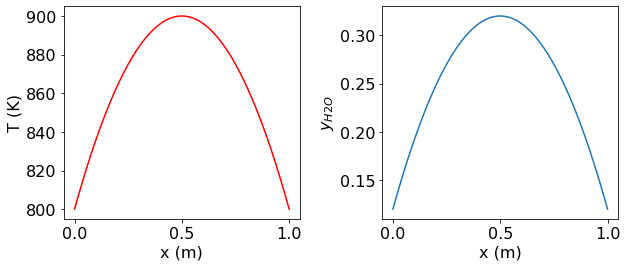

In [8]:
L = 1
x = np.linspace(0,L,100)
T = 400*x*(L-x)/L**2 + 800
y = 0.8*x*(L-x)/L**2 + 0.12

fig,ax=plt.subplots(1,2,figsize=(9,4))
ax[0].plot(x,T,color='red')
ax[0].set_xlabel('x (m)')
ax[0].set_ylabel('T (K)')
ax[1].plot(x,y)
ax[1].set_xlabel('x (m)')
ax[1].set_ylabel(r'$y_{H2O}$');

In [9]:
with _hide_print():
    xQ, Qpm    = ex_3('planckmean')
    xQ, Qwsgg  = ex_3('wsgg')
    xQ, Qrcslw = ex_3('rcslw', 4)

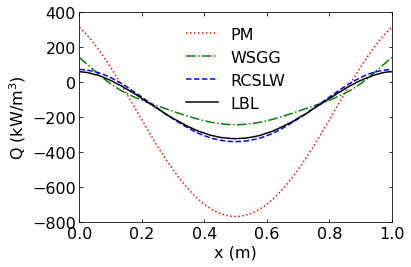

In [10]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_3_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, Qpm/1000,    'r:')
ax.plot(xQ, Qwsgg/1000,  'g-.')
ax.plot(xQ, Qrcslw/1000, 'b--')
ax.plot(lbl[:,0], lbl[:,1], 'k-')

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False)

ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,1])
ax.set_ylim([-800,400]);
plt.savefig('ex_3.pdf');


# Example 4
* L = 1 m domain
* P = 1 atm
* Uniform composition of water vapor with a mole fraction of 0.1
* Black walls at 500 K
* Triangular temperature profile centered at x=0.15 m with a base width of 0.1 m and a peak temperature of 2500 K.

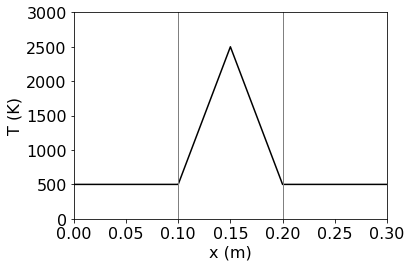

In [11]:
fig, ax = plt.subplots()
ax.plot([0,0.1,0.15,0.2,0.3],   [500,500,2500,500,500], 'k-')
ax.plot([0.1,0.1],[0,3000], color='gray', linewidth=1)
ax.plot([0.2,0.2],[0,3000], color='gray', linewidth=1)
ax.set_xlabel('x (m)')
ax.set_ylabel('T (K)')
ax.set_xlim([0,0.3])
ax.set_ylim([0,3000]);

In [12]:
with _hide_print():
    xQ, Qpm    = ex_4('planckmean')
    xQ, Qwsgg  = ex_4('wsgg')
    xQ, Qrcslw = ex_4('rcslw', 4)

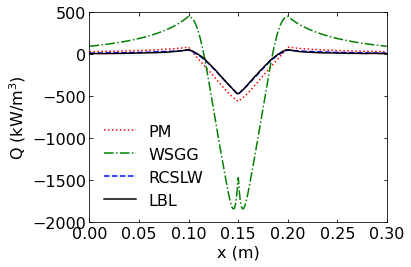

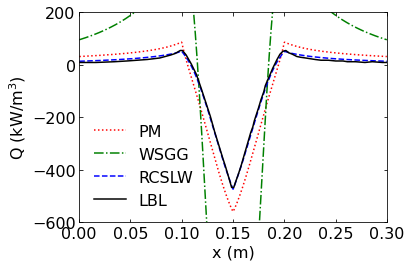

In [13]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_4_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, Qpm/1000,    'r:')
ax.plot(xQ, Qwsgg/1000,  'g-.')
ax.plot(xQ, Qrcslw/1000, 'b--')
ax.plot(lbl[:,0], lbl[:,1], 'k-')

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False)
ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,0.3])
ax.set_ylim([-2000,500]);
plt.savefig('ex_4a.pdf');

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, Qpm/1000,    'r:')
ax.plot(xQ, Qwsgg/1000,  'g-.')
ax.plot(xQ, Qrcslw/1000, 'b--')
ax.plot(lbl[:,0], lbl[:,1], 'k-')

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False)
ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,0.3])
ax.set_ylim([-600,200]);
plt.savefig('ex_4b.pdf');

# Example 5
* L = 2 m domain
* P = 1 atm
* Black walls at T(0)=1500 K, T(L)=500 K.
* Uniform mole fraction of water vapor is 0.1.
* Sinusoidal temperature profile: $T(x)=1000 + 500\cos(\pi x/L)$ K.
* In setting up the RCSLW model, the max temperature gives somewhat better results than using the average temperature.

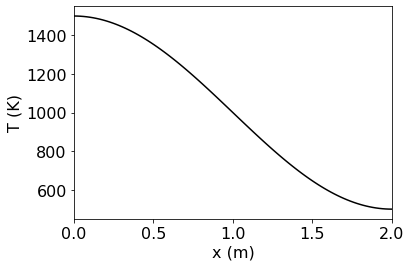

In [14]:
fig, ax = plt.subplots()
L = 2
x = np.linspace(0,L,100)
T = 1000 + 500*np.cos(np.pi*x/L)
ax.plot(x,T, 'k-')
ax.set_xlabel('x (m)')
ax.set_ylabel('T (K)')
ax.set_xlim([0,L]);

In [15]:
with _hide_print():
    xQ, QPM   = ex_5('planckmean')
    xQ, QWSGG = ex_5('wsgg')
    xQ, Q3    = ex_5('rcslw', 3)
    xQ, Q4    = ex_5('rcslw', 4)
    xQ, Q8    = ex_5('rcslw', 8)
    xQ, Q25   = ex_5('rcslw', 25)

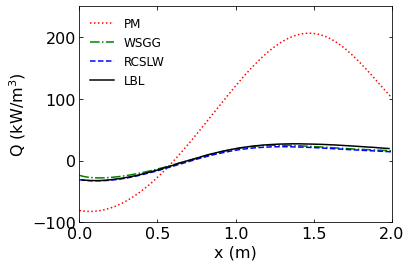

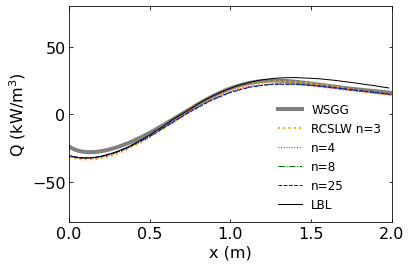

In [16]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_5_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, QPM/1000,       'r:')
ax.plot(xQ, QWSGG/1000,     'g-.')
ax.plot(xQ, Q4/1000,        'b--')
ax.plot(lbl[:,0], lbl[:,1], 'k-')

ax.legend(['PM', 'WSGG', 'RCSLW', 'LBL'], frameon=False, fontsize=12)
ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,2])
ax.set_ylim([-100,250]);
plt.savefig('ex_5a.pdf');

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, QWSGG/1000, '-',  color='gray', linewidth=4)
ax.plot(xQ, Q3/1000,  ':',  color='orange', linewidth=2)
ax.plot(xQ, Q4/1000,  'r:', linewidth=1)
ax.plot(xQ, Q8/1000,  'g-.', linewidth=1)
ax.plot(xQ, Q25/1000, 'b--',  linewidth=1)
ax.plot(lbl[:,0],   lbl[:,1],   'k-', linewidth=1)

ax.legend(['WSGG', 'RCSLW n=3', 'n=4', 'n=8', 'n=25', 'LBL'], frameon=False, fontsize=12)
ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,2])
ax.set_ylim([-80,80]);
plt.savefig('ex_5b.pdf');

### Setup RCSLW using T$_{max}$ instead of T$_{avg}$

In [17]:
with _hide_print():
    use_Tmax = True
    xQ, QWSGG = ex_5('wsgg')
    xQ, Q3    = ex_5('rcslw', 3,  use_Tmax)
    xQ, Q4    = ex_5('rcslw', 4,  use_Tmax)
    xQ, Q8    = ex_5('rcslw', 8,  use_Tmax)
    xQ, Q25   = ex_5('rcslw', 25, use_Tmax)

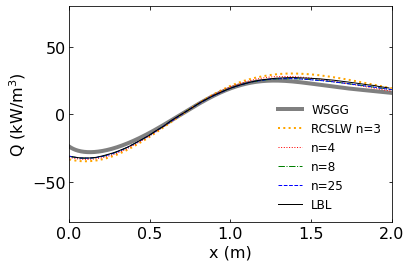

In [18]:
#-------------- LBL data

lbl  = np.loadtxt('LBLdata/ex_5_LBL.dat')

#-------------- PLOT BOILERPLATE

fig, ax = plt.subplots()
ax.tick_params(direction='in', top=True, right=True)
plt.cla()

#-------------- PLOT

ax.plot(xQ, QWSGG/1000, '-',  color='gray', linewidth=4)
ax.plot(xQ, Q3/1000,  ':',  color='orange', linewidth=2)
ax.plot(xQ, Q4/1000,  'r:', linewidth=1)
ax.plot(xQ, Q8/1000,  'g-.', linewidth=1)
ax.plot(xQ, Q25/1000, 'b--',  linewidth=1)
ax.plot(lbl[:,0],   lbl[:,1],   'k-', linewidth=1)

ax.legend(['WSGG', 'RCSLW n=3', 'n=4', 'n=8', 'n=25', 'LBL'], frameon=False, fontsize=12)
ax.set_xlabel(r'x (m)')
ax.set_ylabel(r'Q (kW/m$^3$)')
ax.set_xlim([0,2])
ax.set_ylim([-80,80]);
plt.savefig('ex_5b.pdf');